In [1]:
import numpy as np
import SPaCT
import ppxf
import ppxf_util as util
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from astroML.datasets import fetch_sdss_spectrum
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Un-corrected science frame
NAXIS1: 1934
CRVAL1: 3907
CDELT1: 1.4


/usr/local/lib/python2.7/dist-packages/numpy/lib/polynomial.py:587: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


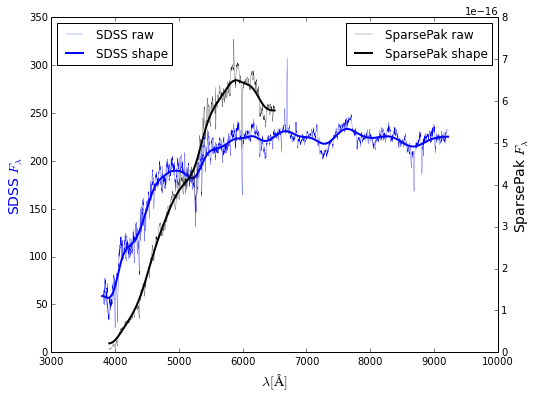

Median log-error: -2.092370695


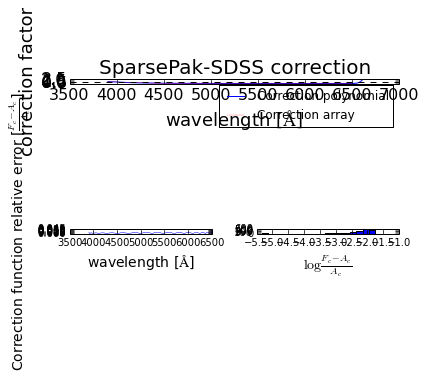

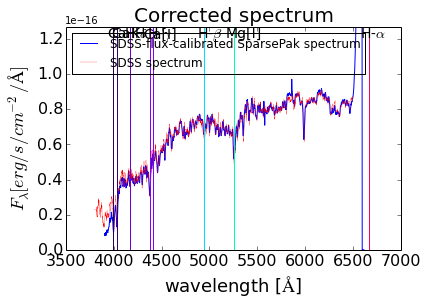

In [6]:
#first do all the correction

objname = 'NGC2558'
z = 0.01637

im, fiberflat = SPaCT.load_ifus_precorrection(objname)

plate = 1927
mjd = 53321
fiber = 290
sdss = fetch_sdss_spectrum(plate, mjd, fiber)

dz, ifu_corr, corr_poly = SPaCT.sdss_cal(im, fiberflat, sdss, dz = 0., z = z, verbose = True, blur = 75, full_output = True)
SPaCT.write_corr_frame(ifu_corr, im, z, dz, objname, verbose = False)

ifu = fits.open('NGC2558_fluxcal.fits')[0].data

81.6592897072 km/s/pix
SparsePak range: [ 3844.07253264  6508.06300855]
Template range: [ 3540.5  7409.6]
[51, 4]
noise: 
[ 1.15683897  1.24176147  1.19662153 ...,  0.16793539  0.1599253
  0.07821559]
noise_2: 
[ 0.21761893  0.56420956  0.0915931  ...,  0.00665315  0.07887428
  0.15498397]
    template name     spectral range IMF type IMF slope   Z      t   
--------------------- -------------- -------- --------- ----- -------
Mun1.30Zm1.71T02.2387              M       un       1.3 -1.71  2.2387
Mun1.30Zm1.71T15.8489              M       un       1.3 -1.71 15.8489
Mun1.30Zm0.40T17.7828              M       un       1.3  -0.4 17.7828
Mun1.30Zm1.31T04.4668              M       un       1.3 -1.31  4.4668
Mun1.30Zm0.71T01.0000              M       un       1.3 -0.71     1.0
Mun1.30Zm1.31T01.4125              M       un       1.3 -1.31  1.4125
Mun1.30Zm0.40T05.0119              M       un       1.3  -0.4  5.0119
Mun1.30Zp0.22T14.1254              M       un       1.3  0.22 14.1254
Mun1.30Zm

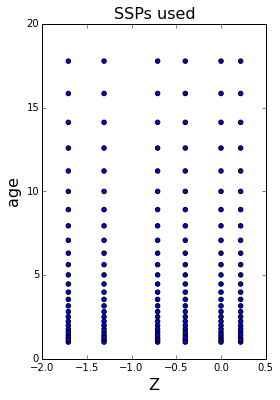

dv: -24646.6077945 km/s
SDSS velocity: 4907.60253746 km/s
Best Fit:       V     sigma        h3        h4        h5        h6
comp. 0       9.49       232
chi2/DOF: 0.001206
Function evaluations: 8
Nonzero Templates:  5  /  156
(2711, 156)
156
Formal errors:
     dV    dsigma   dh3      dh4
     3.6     3.9
Elapsed time in PPXF: 1.00 s
Best-fitting redshift z: 0.0164021619773 +/- 1.19430863914e-05


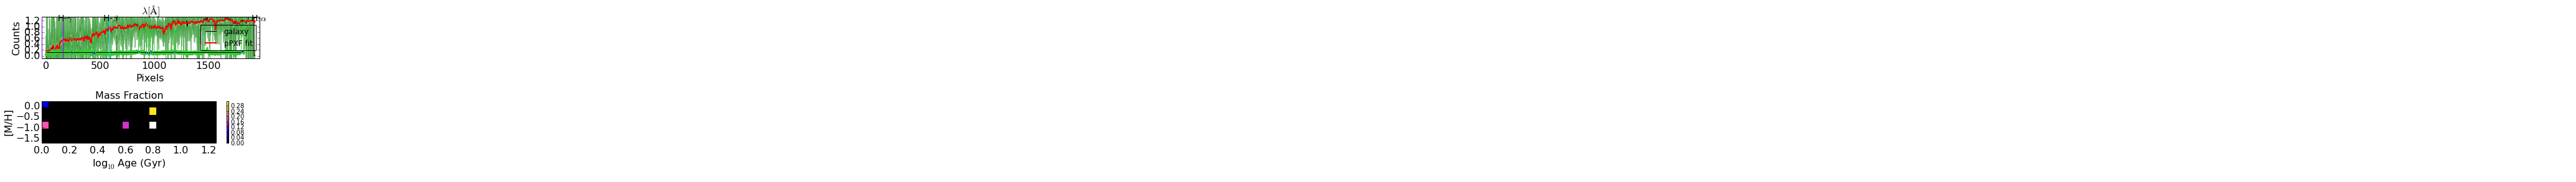

In [10]:
plt.figure(figsize = (12,8))

edgefibers = [51, 4]
n_moments = 2

pp = SPaCT.SP_pPXF((ifu.T/np.median(ifu, axis = 1)).T, fiber = 47, l_summ = (3907., 1.4, 1934), 
	z = z, verbose = True, noise_plots = False, fit_plots = True, 
	edgefibers = edgefibers, age_lim = 20., n_moments = n_moments, bias = 100.)